# Yield Curve EDA

**Chawit & ChatGPT**

Date: February 24th, 2023.

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries 
2. Dataset Preparation
3. EDA

## What is yield curve?

A yield curve is a graphical representation of the yields on different debt securities that have different maturity dates. 

> ### Terminology 
Yield curve = เส้นแสดงอัตราผลตอบแทนของตราสารหนี้ <br>
Treasury bill = ตั๋วเงินคลัง <br>
Treasury bonds = พันธบัตรรัฐบาล <br>
Maturity = กำหนดอายุของตราสารหนี้

## What is an inverted yield curve?

An inverted yield curve is a situation in which the yields on short-term bonds are higher than the yields on long-term bonds. In other words, it is an unusual situation in which the interest rates on short-term debt instruments such as treasury bills and bonds are higher than those on long-term debt instruments such as 10-year or 30-year Treasury bonds.

## Why are we choosing Inverted Yield Curve?

The inverted yield curve is considered a reliable predictor of an upcoming economic recession or a slowdown in economic growth. This is because it indicates that investors have a pessimistic outlook on the economy's future and prefer to invest in shorter-term, safer investments rather than long-term investments.

In this notebook, we perform Exploratory Data Analysis (EDA) of 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (T10Y2Y), obtained from the [link](https://fred.stlouisfed.org/series/T10Y2Y#0)

##1. Installation Libraries

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf  
from datetime import date
from datetime import timedelta

import seaborn as sns
sns.set_palette("mako")
from matplotlib import pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

plotsize = (15, 4)

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index1')

Mounted at /content/drive


In [6]:
df = pd.read_csv('T10Y2Y.csv') #Dataset file
df.head()

,DATE,T10Y2Y
0,1976-06-01,0.68
1,1976-06-02,0.71
2,1976-06-03,0.70
3,1976-06-04,0.77
4,1976-06-07,0.79


In [7]:
len(df)

12196

In [8]:
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.set_index('DATE') 
df["T10Y2Y"] = pd.to_numeric(df['T10Y2Y'], errors='coerce')
type(df["T10Y2Y"][0])

numpy.float64

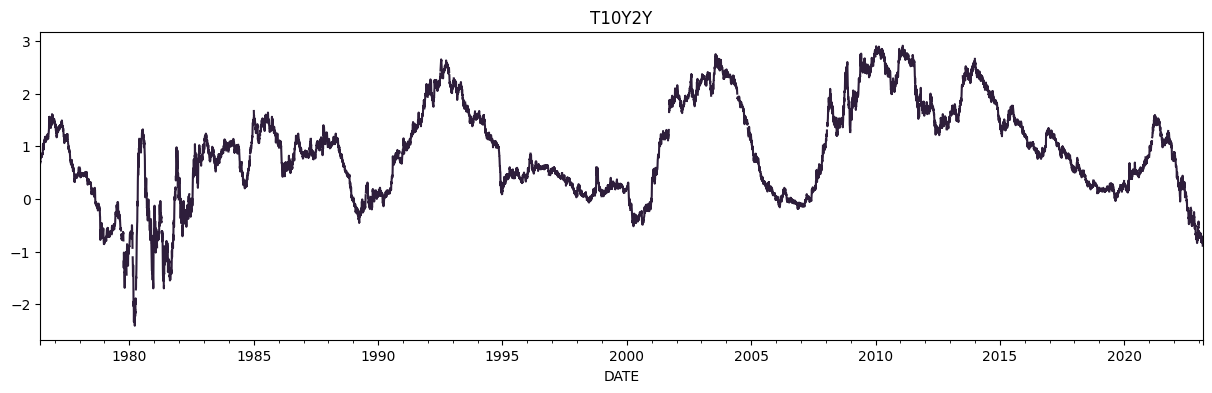

In [9]:
df["T10Y2Y"].plot(figsize = plotsize, title = "T10Y2Y")
plt.show()

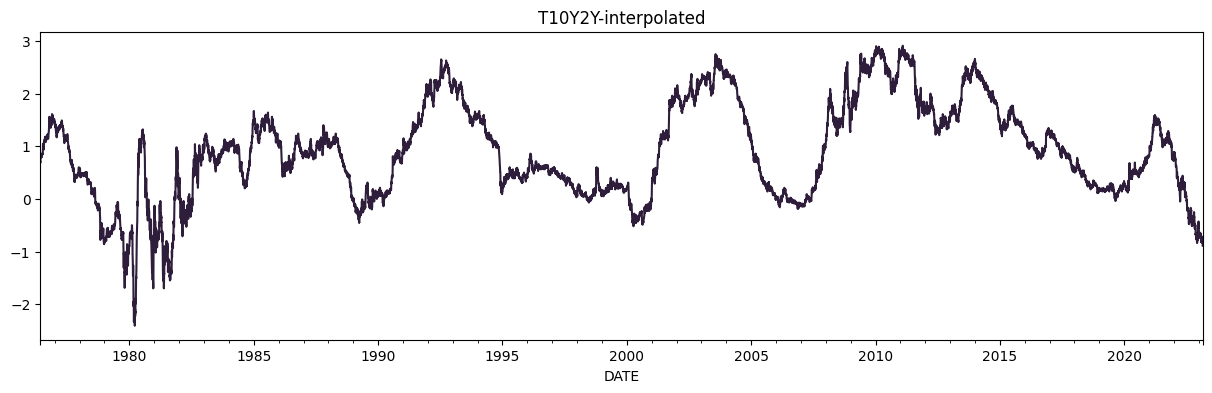

In [10]:
df["T10Y2Y"] = df.interpolate(method='time')
df["T10Y2Y"].plot(figsize = plotsize, title = "T10Y2Y-interpolated")
plt.show()

## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

### 3.1 Descriptive Statistics

In [11]:
df.describe()

,T10Y2Y
count,12196.000000
mean,0.905233
std,0.908858
min,-2.410000
25%,0.230000
50%,0.860000
75%,1.520000
max,2.910000


### 3.2 Resampling

In [12]:
df_weekly = df.resample('W').mean()
df_monthly = df.resample('M').mean()
df_quarterly = df.resample('Q').mean()
df_yearly = df.resample('Y').mean()

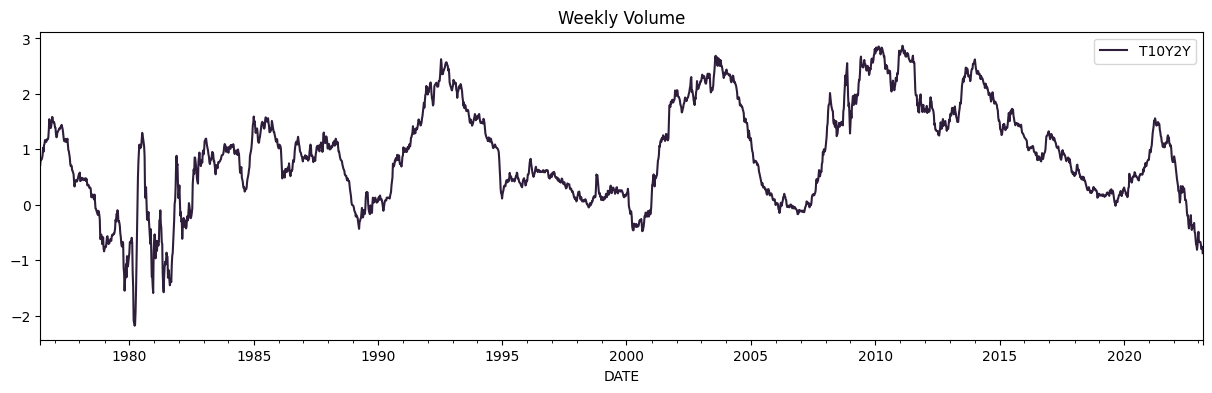

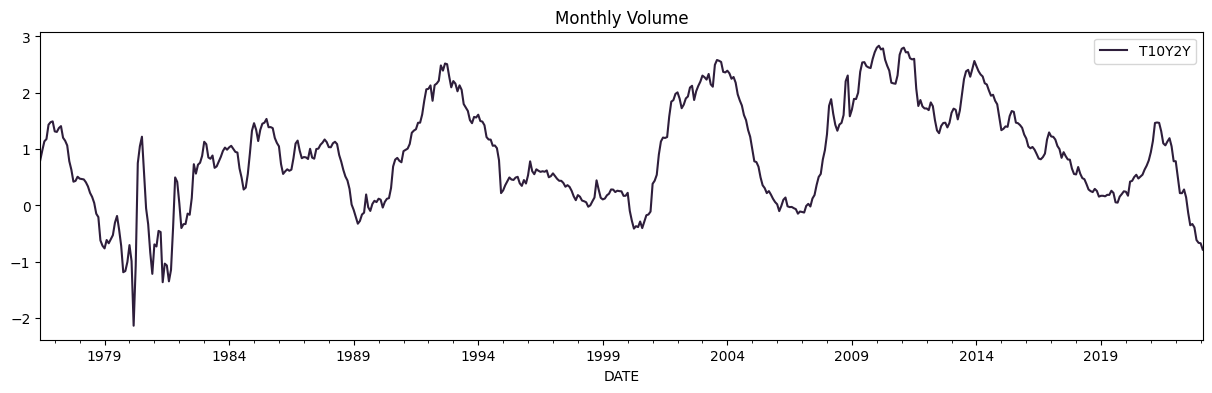

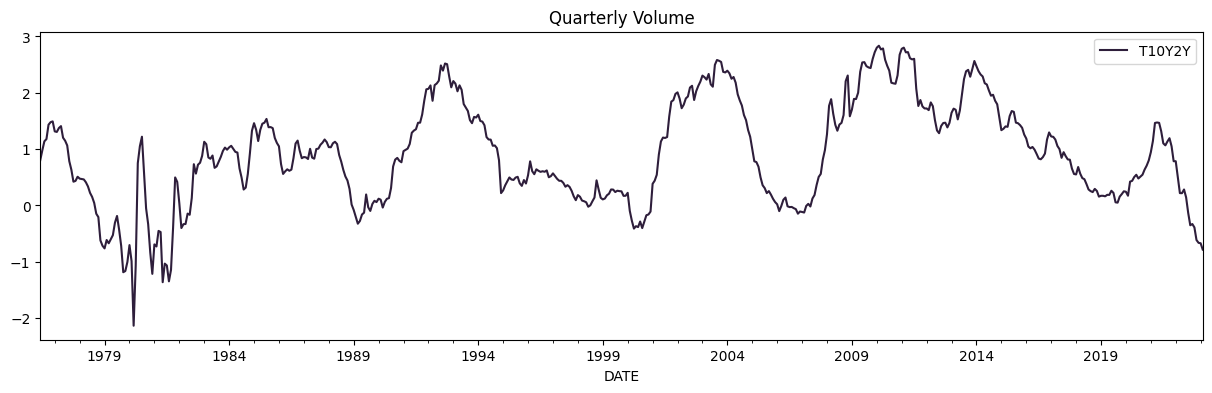

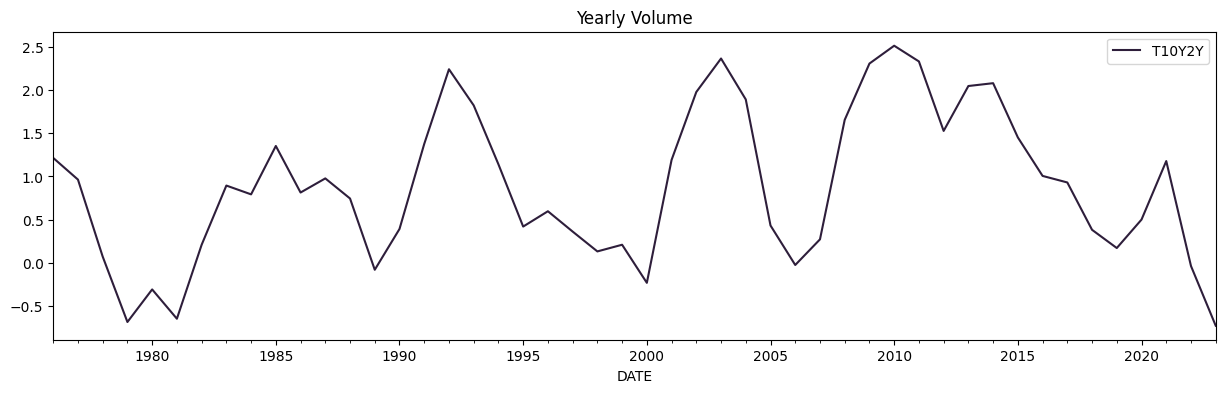

In [13]:
df_weekly.plot(figsize=plotsize, title='Weekly Volume')
plt.show()
df_monthly.plot(figsize=plotsize, title='Monthly Volume')
plt.show()
df_monthly.plot(figsize=plotsize, title='Quarterly Volume')
plt.show()
df_yearly.plot(figsize=plotsize, title='Yearly Volume')
plt.show()

### 3.3 Change/Return

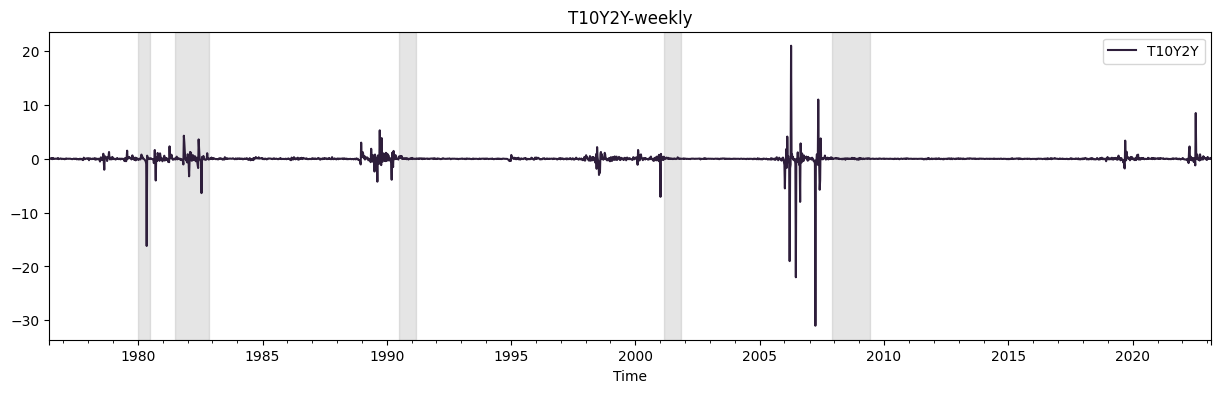

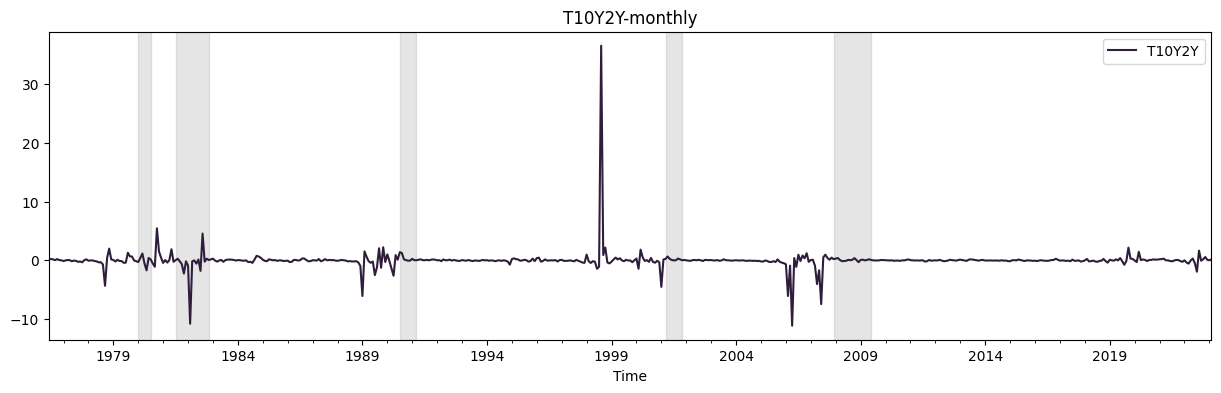

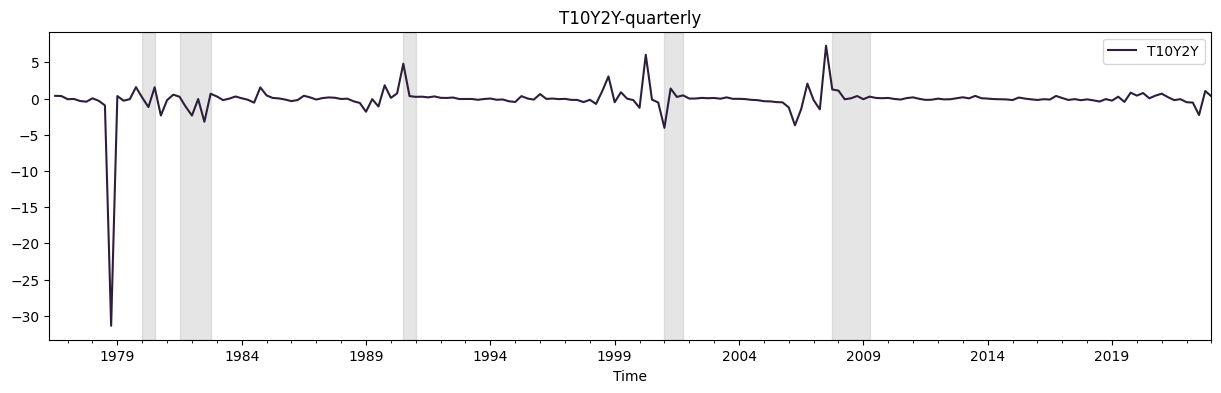

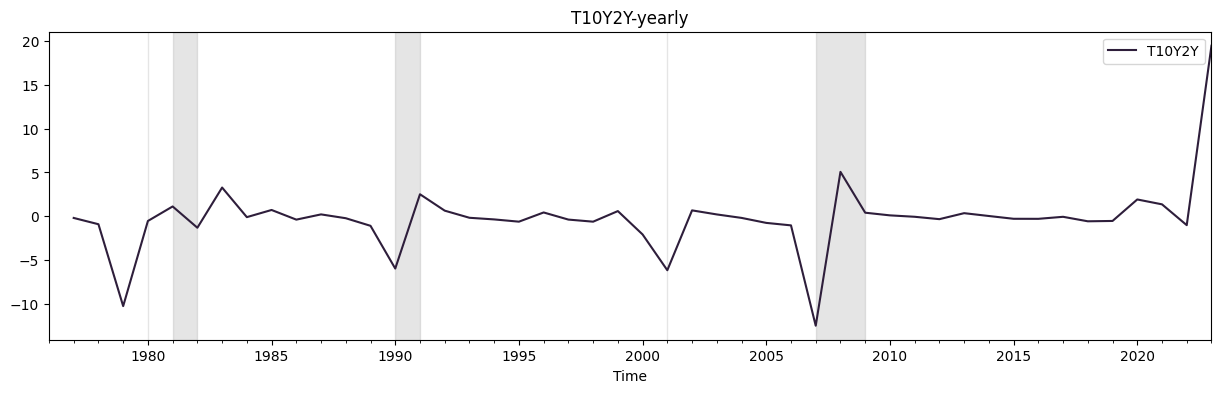

In [14]:
weekly_returns = df_weekly.pct_change()
weekly_returns.plot(figsize = plotsize, title = "T10Y2Y-weekly")

recession_periods = [('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

# display the chart
plt.xlabel("Time")
plt.show()

monthly_returns = df_monthly.pct_change()
monthly_returns.plot(figsize = plotsize, title = "T10Y2Y-monthly")

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

# display the chart
plt.xlabel("Time")
plt.show()

quarterly_returns = df_quarterly.pct_change()
quarterly_returns.plot(figsize = plotsize, title = "T10Y2Y-quarterly")

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

# display the chart
plt.xlabel("Time")
plt.show()

yearly_returns = df_yearly.pct_change()
yearly_returns.plot(figsize = plotsize, title = "T10Y2Y-yearly")

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

# display the chart
plt.xlabel("Time")
plt.show()

### 3.4 Stationarity analysis

The **Augmented Dickey-Fuller (ADF)** test is a statistical test used to determine whether a given time-series data is stationary or not. It is a popular test in time-series analysis, especially for modeling and forecasting.

The ADF test is based on the null hypothesis that the time-series data has a unit root, which means that it is non-stationary. The alternative hypothesis is that the data is stationary, which means that it does not have a unit root. The ADF test determines the likelihood of the null hypothesis by estimating the strength of the autoregressive relationship in the data.

The ADF test estimates the following regression model:

$y(t) = \alpha + \beta t + \gamma y(t-1) + \delta 1 \Delta y(t-1) + \delta 2 \Delta y(t-2) + ... + \delta p \Delta y(t-p) + \varepsilon (t)$

where y(t) is the value of the time-series data at time t, Δ is the first difference operator, α is the intercept, β is the trend coefficient, γ is the coefficient on the lagged dependent variable, δ1 to δp are the coefficients on the lagged first differences of the dependent variable, and ε(t) is the error term.

The ADF test then computes a test statistic based on the regression results and compares it with critical values from a table to determine whether to reject or fail to reject the null hypothesis. If the test statistic is less than the critical value, we can reject the null hypothesis and conclude that the data is stationary. If the test statistic is greater than the critical value, we fail to reject the null hypothesis and conclude that the data is non-stationary.

The ADF test has several variations, such as the augmented ADF (ADF-GLS) and the seasonal ADF (SADF), which are used to handle different types of non-stationarity in the data.

In [15]:
# Define a function to perform stationarity testing
def stationarity_test(data):
    # Augmented Dickey-Fuller (ADF) test
    result_adf = adfuller(data)
    print('ADF Statistic: %f' % result_adf[0])
    print('p-value: %f' % result_adf[1])
    print('Critical Values:')
    for key, value in result_adf[4].items():
        print('\t%s: %.3f' % (key, value))

    # Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
    result_kpss = kpss(data)
    print('\nKPSS Statistic: %f' % result_kpss[0])
    print('p-value: %f' % result_kpss[1])
    print('Critical Values:')
    for key, value in result_kpss[3].items():
        print('\t%s: %.3f' % (key, value))

# Perform stationarity testing on the data

stationarity_test(df["T10Y2Y"])

ADF Statistic: -2.872770
p-value: 0.048607
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

KPSS Statistic: 2.162375
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Therefore, **Yield Curve** is **stationary**.

### 3.6 Trends, Seasonal, Residual Decomposition

In [16]:
#@title Default title text
data_transformed = df["T10Y2Y"] + np.abs(df["T10Y2Y"].min()) + 1

# Take logarithm of transformed data
data_transformed = np.log(data_transformed)

decomp = sm.tsa.seasonal_decompose(data_transformed, model='additive')

# Obtain components and transform back to original scale
trend = np.exp(decomp.trend) - np.abs(df["T10Y2Y"].min()) - 1
seasonal = np.exp(decomp.seasonal) - np.abs(df["T10Y2Y"].min()) - 1
residual = np.exp(decomp.resid) - np.abs(df["T10Y2Y"].min()) - 1

In [17]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df["T10Y2Y"], model='additive', period=365)

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

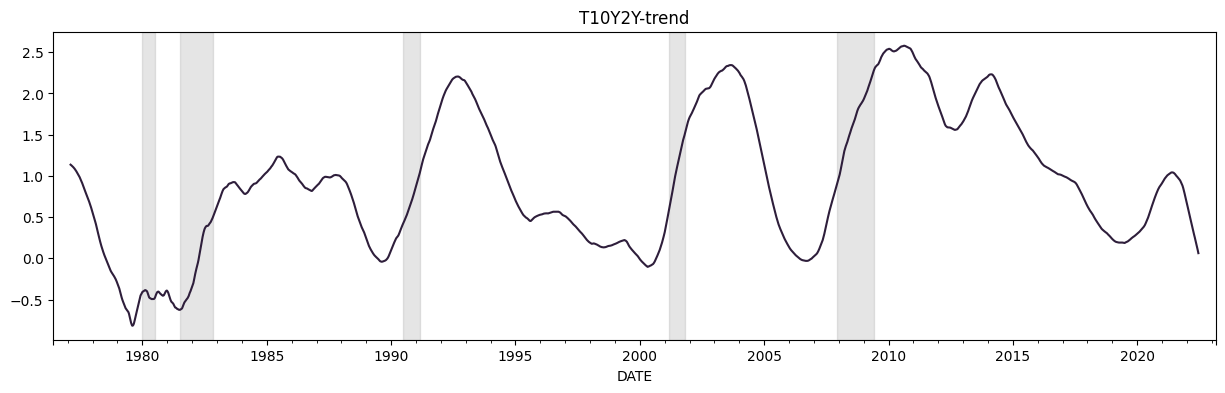

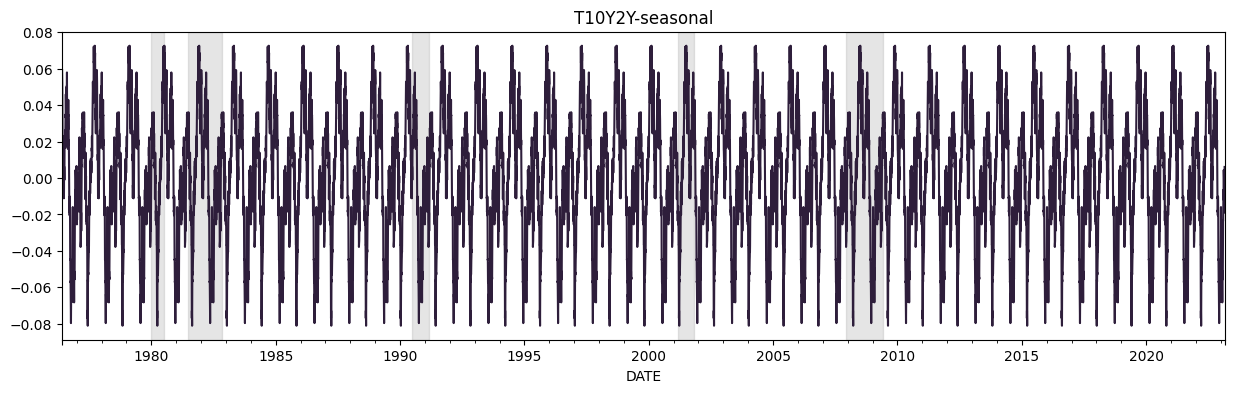

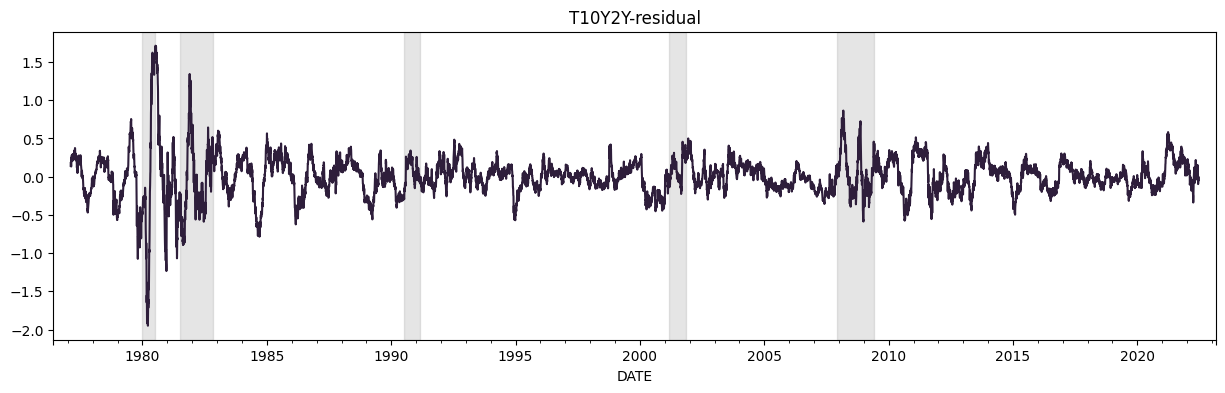

In [18]:
trend.plot(figsize = plotsize, title = "T10Y2Y-trend")

recession_periods = [('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.show()

seasonal.plot(figsize = plotsize, title = "T10Y2Y-seasonal")

recession_periods = [('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.show()

residual.plot(figsize = plotsize, title = "T10Y2Y-residual")

recession_periods = [('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.show()

## 4. Time-series Modeling

### 4.1 ARIMA model

Autoregressive Integrated Moving Average (ARIMA): This is a widely used model for time-series data that exhibits a certain degree of correlation and/or seasonality. The model assumes that the current value of the time-series is a function of its past values and some random error term. The ARIMA model can be used for both short-term and long-term forecasting.

In [19]:
model = auto_arima(df["T10Y2Y"], start_p=0, start_d=0, start_q=0,
                   max_p=5, max_d=2, max_q=5, seasonal=False,
                   trace=True, error_action='ignore', suppress_warnings=True)
                   
# Print the selected (p,d,q) values
print(model.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-41172.519, Time=4.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-41183.189, Time=1.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-41182.730, Time=2.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-41174.418, Time=1.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-41184.414, Time=3.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-41199.258, Time=5.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-41197.261, Time=4.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-41197.245, Time=4.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-41182.656, Time=16.77 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-41195.257, Time=7.96 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-41201.160, Time=2.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-41186.322, Time=1.30 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-41199.163, Time=1.72 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-41199.146, Time=1.58 sec
 ARI

In [20]:
# Fit ARIMA model
model = ARIMA(df["T10Y2Y"][-3650:], order=model.order)
results = model.fit()

# Predict future values
forecast = results.predict(start=date.today(), end=date.today() + timedelta(days=30))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


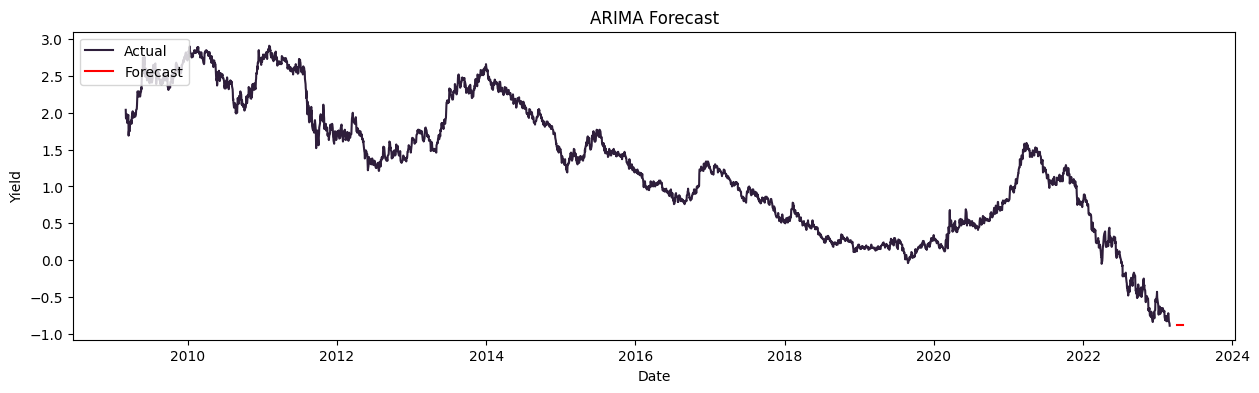

In [21]:
plt.figure(figsize=plotsize)
plt.plot(df["T10Y2Y"][-3650:], label='Actual')
plt.plot(forecast.index, forecast.values, label='Forecast', color="red")
plt.legend(loc='upper left')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.show()

### 4.2 SARIMA model
Seasonal Autoregressive Integrated Moving Average (SARIMA): This is a variation of the ARIMA model that takes into account the seasonal component of the time-series data. The SARIMA model can be used when there is a clear seasonal pattern in the data, such as monthly, quarterly, or yearly seasonality.

### 4.3 VAR model
Vector Autoregression (VAR): This is a model that can be used when there are multiple time-series that are interrelated and affect each other. The VAR model assumes that each variable is a function of its past values and the past values of all the other variables in the system. The VAR model can be used for short-term forecasting of multiple related time-series.

### 4.4 ETS model
Exponential Smoothing (ETS): This is a family of models that includes several variations, such as Simple Exponential Smoothing, Holt's Linear Exponential Smoothing, and Seasonal Exponential Smoothing. The ETS models are used to capture the trend and seasonality of the time-series data, and can be used for both short-term and long-term forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<Axes: >

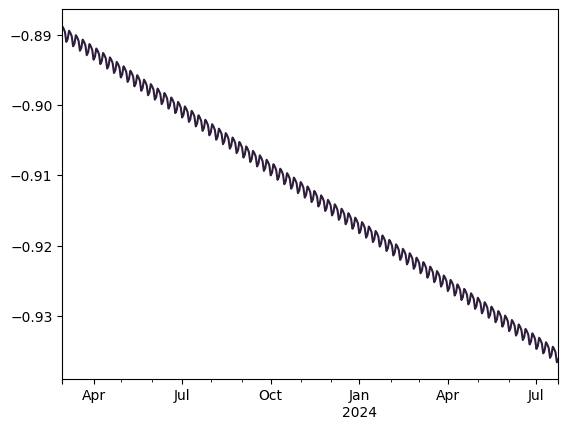

In [52]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the time-series data into a Pandas dataframe
ets_data = df.copy()

# Fit the ETS model
model = ExponentialSmoothing(ets_data, trend='add', seasonal='add')
result = model.fit()

# Make a forecast
forecast = result.forecast(steps=365)

# Plot the forecast
forecast.plot()

### 4.5 Prophet

Prophet: This is a model developed by Facebook for forecasting time-series data that exhibits both trend and seasonality, and may also have other factors such as holidays, events, and changes in behavior. Prophet uses a Bayesian framework to model the data and can be used for both short-term and long-term forecasting.


In [29]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 3.2 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu86d4w8b/vvqoncuz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu86d4w8b/jwd_f3kz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58604', 'data', 'file=/tmp/tmpu86d4w8b/vvqoncuz.json', 'init=/tmp/tmpu86d4w8b/jwd_f3kz.json', 'output', 'file=/tmp/tmpu86d4w8b/prophet_model9baooc1y/prophet_model-20230402115204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


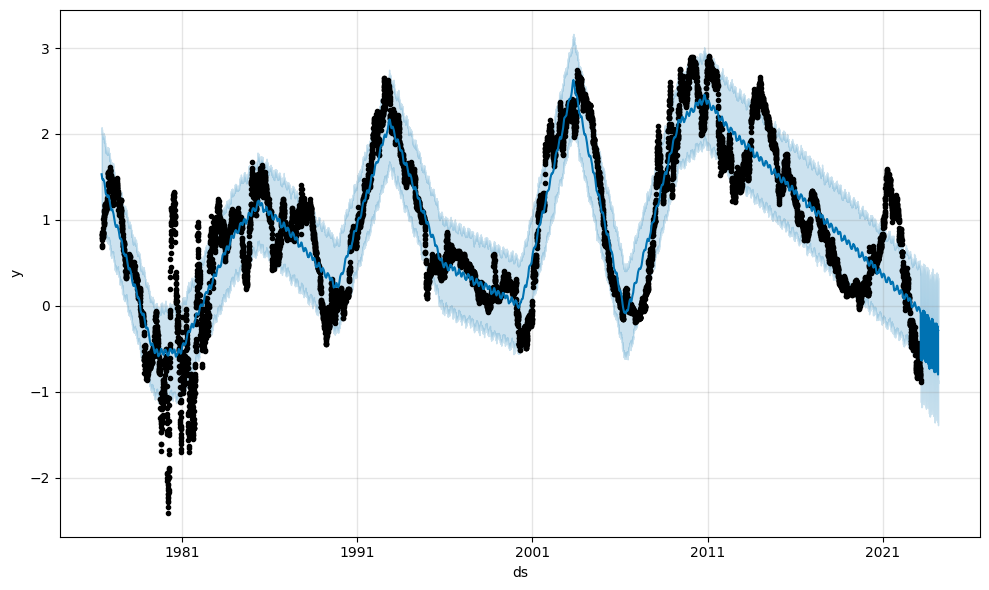

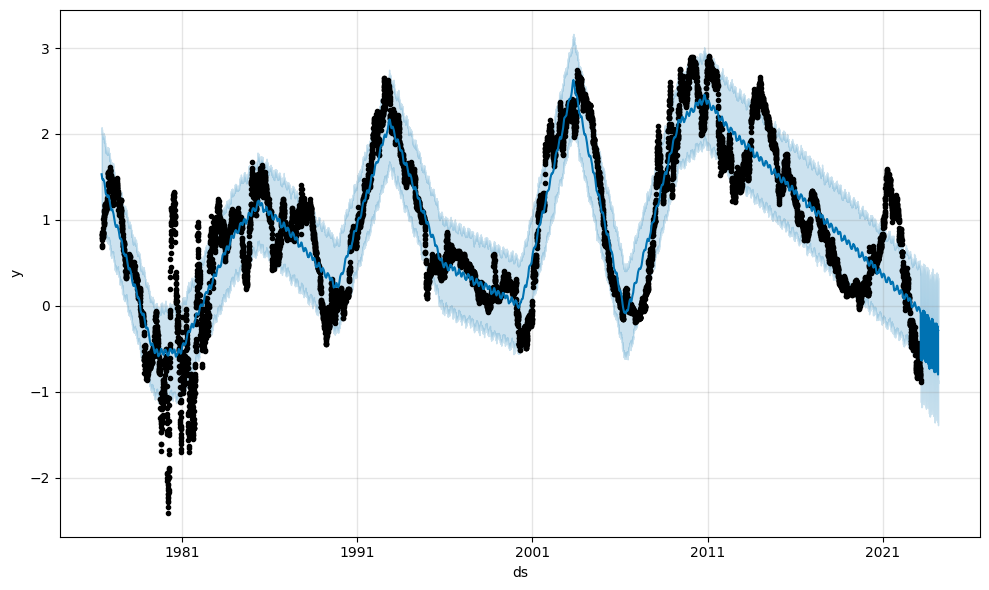

In [49]:
import pandas as pd
import prophet

# Load the time-series data into a Pandas dataframe
prophet_data = df.copy()

prophet_data = prophet_data.reset_index().rename(columns={'index': 'date'})

prophet_data = prophet_data.rename(columns={'DATE': 'ds', 'T10Y2Y': 'y'})

# Fit the Prophet model
model = prophet.Prophet()
model.fit(prophet_data)

# Make a forecast
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

# S&P500

In [22]:
SP = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [23]:
SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.122339,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.301025,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.354628,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.622646,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.729855,531500


In [24]:
SP.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7.598000e+03
mean,163.865944,164.863539,162.763901,163.870471,136.372449,8.462165e+07
std,99.247917,99.810355,98.637834,99.266130,105.047924,9.342070e+07
min,43.343750,43.531250,42.812500,43.406250,24.818586,5.200000e+03
25%,103.985003,105.015001,103.156250,104.076876,70.756298,9.351500e+06
50%,130.860001,131.709999,129.913124,130.849998,93.559963,6.204620e+07
75%,206.720001,207.789993,205.574997,206.709999,180.210217,1.179246e+08
max,479.220001,479.980011,476.059998,477.709991,468.296448,8.710263e+08


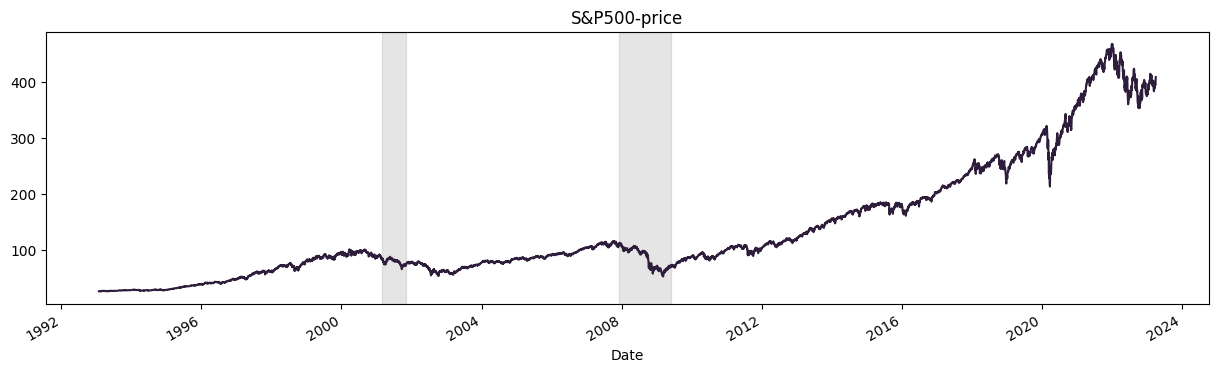

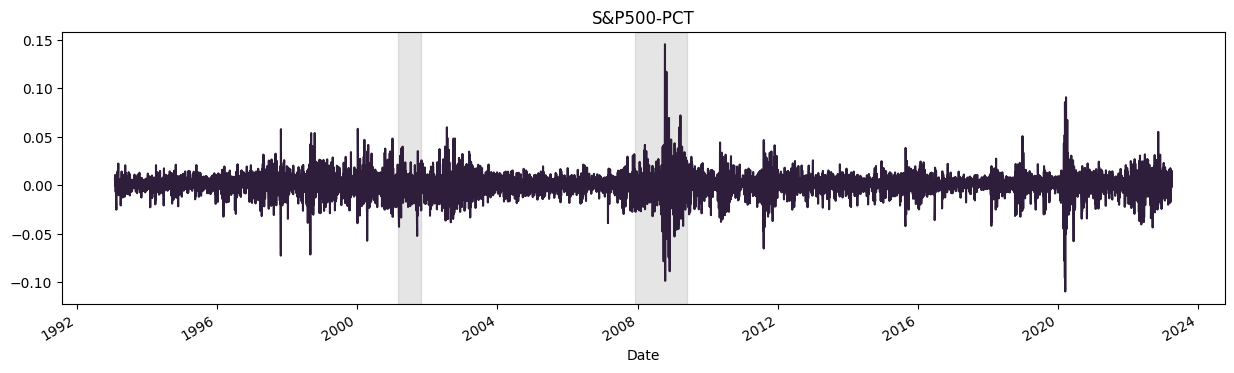

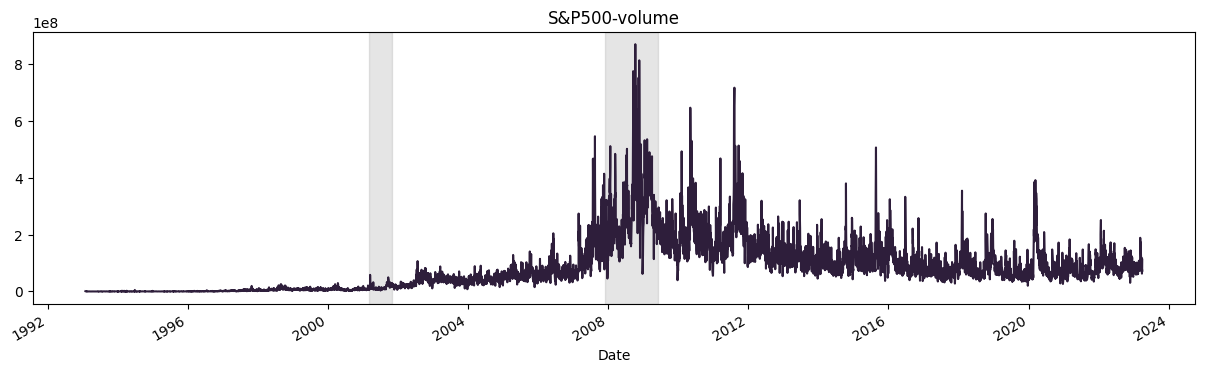

In [25]:
# Plot the close prices
SP["Adj Close"].plot(figsize = plotsize, title = "S&P500-price")
recession_periods = [('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.show()

SP["Adj Close"].pct_change().plot(figsize = plotsize, title = "S&P500-PCT")
recession_periods = [('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.show()

SP["Volume"].plot(figsize = plotsize, title = "S&P500-volume")

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.show()

<ipython-input-26-dbc3b8bba67e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), color='blue')
<ipython-input-26-dbc3b8bba67e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), color='red')


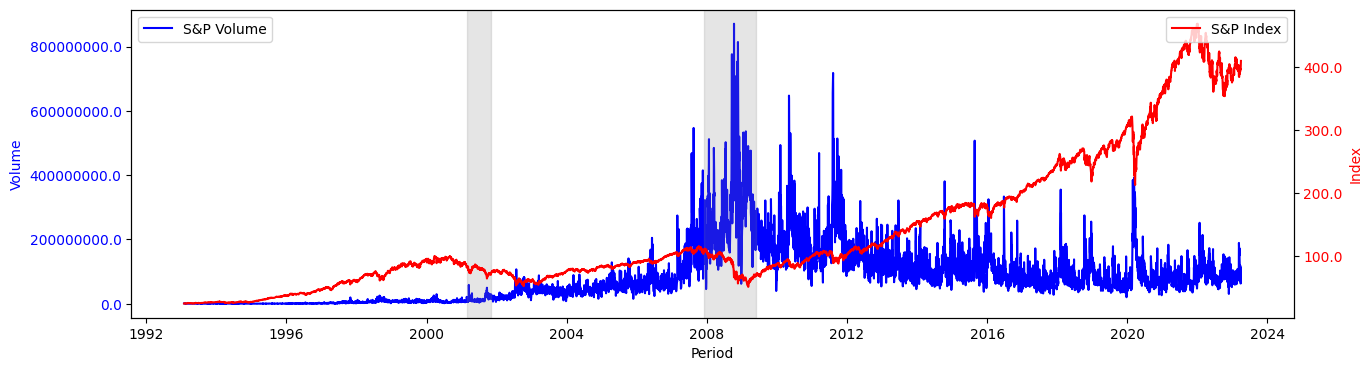

In [26]:
fig, ax1 = plt.subplots(figsize = plotsize)
ax1.plot(SP["Volume"], color='blue')
ax1.set_xlabel('Period')
ax1.set_ylabel('Volume', color='blue')

# Create the second axis and plot the second data set
ax2 = ax1.twinx()
ax2.plot(SP["Adj Close"], color='red')
ax2.set_ylabel('Index', color='red')

# Set the tick labels for both axes
ax1.set_yticklabels(ax1.get_yticks(), color='blue')
ax2.set_yticklabels(ax2.get_yticks(), color='red')

# Add a legend
ax1.legend(['S&P Volume'], loc='upper left')
ax2.legend(['S&P Index'], loc='upper right')

recession_periods = [('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)


# Show the plot
plt.show()